## Mini-Batch Gradient Descent

* batch -> group of rows (if n=1000 then batch_size = 10 , total batches = 100)

* updates per epochs => no. of batches

* it is a general form u can shift to batch gd or sgd from mini-batch gd by twikings the batch_size

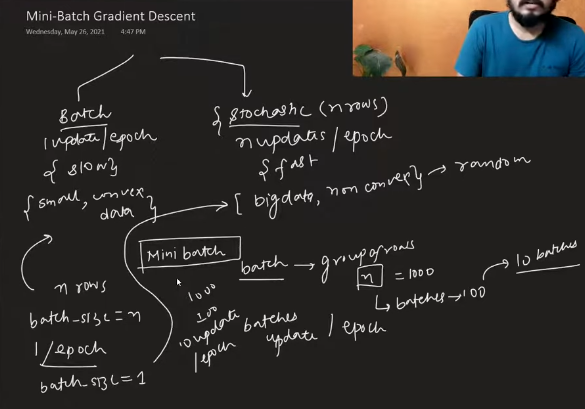

In [1]:
from sklearn.datasets import load_diabetes

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import random
import numpy as np

In [10]:
from sklearn.metrics import r2_score

In [2]:
X,y = load_diabetes(return_X_y=True)

In [3]:
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [23]:
reg = LinearRegression()

In [25]:
reg.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = reg.predict(X_test)

In [28]:
r2_score(y_test, y_pred)

0.4399338661568968

In [26]:
print(reg.coef_)
print(reg.intercept_)

[  -9.15865318 -205.45432163  516.69374454  340.61999905 -895.5520019
  561.22067904  153.89310954  126.73139688  861.12700152   52.42112238]
151.88331005254167


In [42]:
class MBGDRegressor:

    def __init__(self, batch_size, learning_rate = 0.01, epochs=100):
        
        self.coef_ = None
        self.intercept_ = None

        self.epochs = epochs
        self.lr = learning_rate
        self.batch_size = batch_size
    
    def fit(self, X_train, y_train):

        # init coef and intercept
        self.intercept_ = 0
        self.coef_ = np.ones(X_train.shape[1])

        for i in range(self.epochs):
            
            for j in range(int(X_train.shape[0]/self.batch_size)):
            
                idx = random.sample(range(X_train.shape[0]), self.batch_size)

                y_hat = np.dot(X_train[idx], self.coef_) + self.intercept_

                intercept_der = -2 * np.mean(y_train[idx] - y_hat)
                self.intercept_ = self.intercept_ - (self.lr * intercept_der)

                coef_der = -2 * np.dot((y_train[idx] - y_hat), X_train[idx])
                self.coef_ = self.coef_ - (self.lr * coef_der)

        
        print(self.intercept_, self.coef_)

    def predict(self, x_test):
        return np.dot(X_test, self.coef_) + self.intercept_


In [44]:
mbg = MBGDRegressor(batch_size=int(X_train.shape[0]/50), learning_rate=0.01, epochs=100)

In [45]:
mbg.fit(X_train, y_train)

152.1121373797134 [  25.12874921 -134.00866022  456.82966417  307.12959354  -30.59594298
 -101.79211265 -188.82022546  106.45515707  408.468263    118.57550103]


In [47]:
y_pred = mbg.predict(X_test)

In [48]:
r2_score(y_test, y_pred)

0.4525972429074733

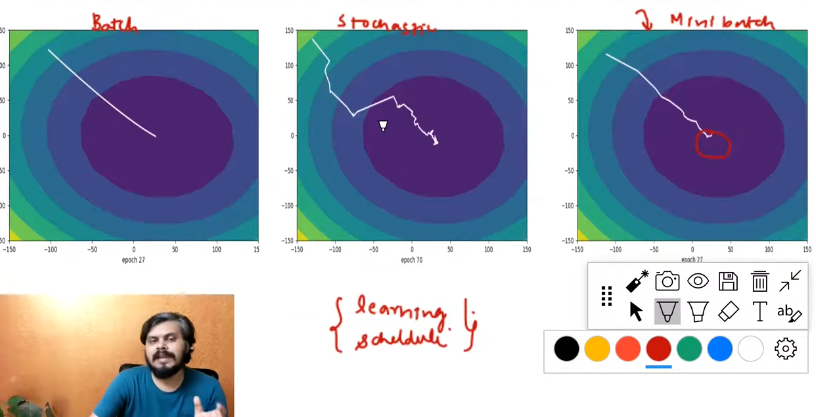